In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Synthetic_dataset_1")

In [3]:
X=df.drop('Class',axis=1)
Y=df['Class']

In [4]:
x=X.to_numpy()
y=Y.to_numpy()

In [5]:
model_result={}
def store(model_name,r2,mse,acc):
    
    model_result[model_name]={
        'mse':mse,
        'r2':r2,
        'acc':acc
    }
    

In [6]:
store('original_dataset_tested', 0.7444583137137805, 0.00043888908395070395, 0.9995611109160493)

In [7]:
print(model_result)

{'original_dataset_tested': {'mse': 0.00043888908395070395, 'r2': 0.7444583137137805, 'acc': 0.9995611109160493}}


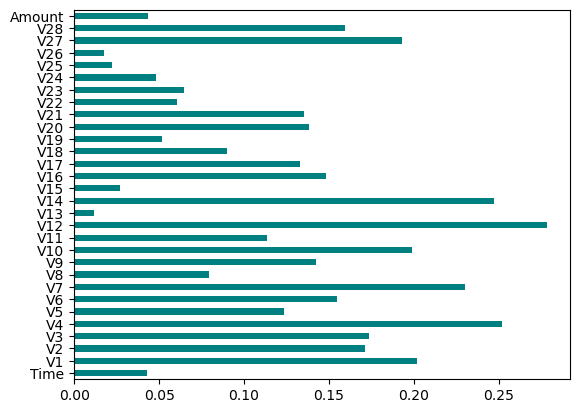

In [8]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
importance =mutual_info_classif(X,Y)
feat_importance=pd.Series(importance,df.columns[0:len(df.columns)-1])

feat_importance.plot(kind='barh', color='teal')
plt.show()

In [9]:
feat_importance

Time      0.042878
V1        0.201921
V2        0.171207
V3        0.173274
V4        0.251623
V5        0.123704
V6        0.154770
V7        0.229996
V8        0.079378
V9        0.142577
V10       0.198569
V11       0.113686
V12       0.278102
V13       0.011769
V14       0.247251
V15       0.027065
V16       0.148443
V17       0.132913
V18       0.089678
V19       0.051574
V20       0.138047
V21       0.135371
V22       0.060297
V23       0.064637
V24       0.048037
V25       0.022415
V26       0.017737
V27       0.193049
V28       0.159297
Amount    0.043574
dtype: float64

In [17]:
df_columns_ig=['V12','V4','V14','V7','V1','V10','V27','V3','V2','V28','Class']

In [18]:
df_ig=df[df_columns_ig]

In [12]:
from sklearn.model_selection import train_test_split

# Sample a smaller subset (adjust sample_size as needed)
sample_size = 10000
X_sample, _, y_sample, _ = train_test_split(x, y, test_size=1 - sample_size/len(y), random_state=42)

# Calculate Fisher core on the sample dataset
# (Use a different feature selection method or implement custom logic)


In [15]:
from skfeature.function.similarity_based import fisher_score
%matplotlib inline
ranls=fisher_score.fisher_score(X_sample,y_sample)

<Axes: >

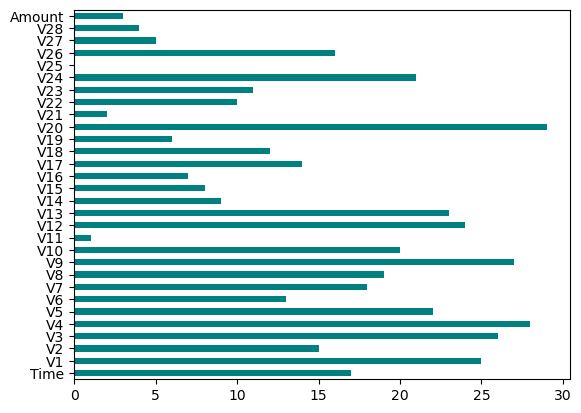

In [16]:
importances=pd.Series(ranls,df.columns[0:len(df.columns)-1])
importances.plot(kind='barh',color='teal')

In [21]:


importances

Time      17
V1        25
V2        15
V3        26
V4        28
V5        22
V6        13
V7        18
V8        19
V9        27
V10       20
V11        1
V12       24
V13       23
V14        9
V15        8
V16        7
V17       14
V18       12
V19        6
V20       29
V21        2
V22       10
V23       11
V24       21
V25        0
V26       16
V27        5
V28        4
Amount     3
dtype: int32

In [23]:
df_columns_fs=['V11','V21','Amount','V28','V27','V19','V16','V15','V14','V22','Class']

In [24]:
df_fs=df[df_columns_fs]
df_fs

,V11,V21,Amount,V28,V27,V19,V16,V15,V14,V22,Class
0,1.251042,0.025603,0.000000,0.125026,-0.228846,0.870259,-0.440829,0.034738,-2.603795,1.108855,1
1,-1.338070,-0.216972,27.420039,0.040248,-0.025401,0.203526,-0.440561,0.694595,-0.366919,-0.612481,0
2,0.700526,2.038021,0.000000,1.052773,-1.435609,-0.784480,0.696434,-0.117615,-2.950197,1.198265,1
3,1.439402,-5.853206,0.000000,0.934863,-3.599908,0.391298,-0.625458,0.426101,-0.740922,-1.147151,1
4,-0.305889,0.621236,0.000000,0.248670,0.280183,-1.249272,-0.704826,-0.211623,-8.540744,0.110862,1
...,...,...,...,...,...,...,...,...,...,...,...
199995,-0.358176,-0.175160,468.243105,-0.015987,-0.065688,0.233957,-0.183138,-0.897670,-0.117171,-0.858522,0
199996,-0.639807,0.101032,1.860317,0.076868,0.009535,0.051968,0.309483,0.657004,0.386770,-0.452896,0
199997,0.495321,0.517985,33.627312,0.135118,-1.251311,2.330885,0.299379,-0.001109,-0.730569,0.262684,1
199998,0.508551,0.025384,111.731691,0.134510,0.083486,0.732795,-1.034206,0.680007,0.119820,0.411054,0


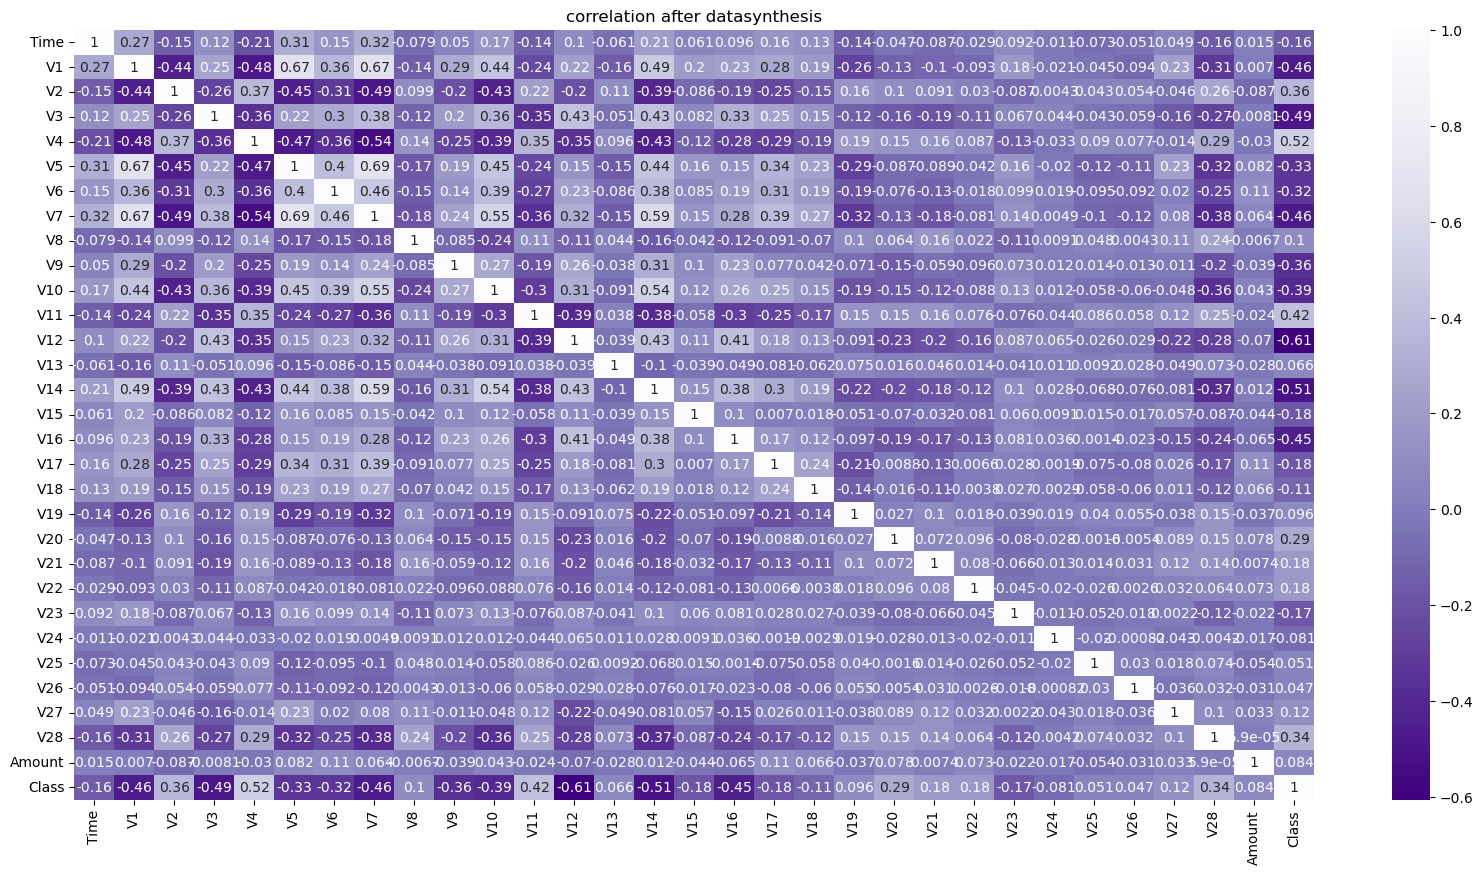

In [25]:
import seaborn as sns
corr_mat=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat, annot=True,cmap='Purples_r')
plt.title("correlation after datasynthesis")
plt.show()

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(x)

In [ ]:
v_threshold.get_support()